In [4]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sb

## read data

In [1]:
# Define paths
path_s2 =r"C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/9x9/1.9x9 1000 samples -S2/"
path_s3_one_sided = r"C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/9x9/2. 9x9 1000 samples -S3 Two sided False/"
path_s3_two_sided = r'C:/Users/Domantas/Desktop/VU AI/knowledge representation/sat_solver/data/9x9/3. 9x9 1000 samples -S3 Two sided True/'


In [5]:
def logs_to_df(path):
    os.chdir(path)

    result_df = pd.DataFrame(columns=['heuristic', 'start_time', 'unit_literals', 'number_of_nodes','number_of_backtracks', 'time_lapsed', 'n_givens'])
    index_counter = 0
    for file in os.listdir(): # iterates through all sudoku log file names
        # Create the filepath of particular file
        file_path =f"{path}/{file}"
        with open(file_path) as f:
            data = f.read()

        js = json.loads(data)


        for key in list(js):
            if key not in ['heuristic', 'start_time','number_of_nodes','number_of_backtracks','time_lapsed','unit_literals','puzzle_clauses']:
                js.pop(key)

        js.update({'n_givens' : len(js['puzzle_clauses'])})
        js.pop('puzzle_clauses')

        result_df = pd.concat([result_df, pd.DataFrame(js, index=[index_counter])])
        index_counter+=1
    return result_df

### 9x9 heuristic 2:

In [7]:
result_df_h2 = logs_to_df(path_s2)
result_df_h2['heuristic'] = 'h2'
result_df_h2.head()

,heuristic,start_time,unit_literals,number_of_nodes,number_of_backtracks,time_lapsed,n_givens
0,h2,1.668796e+09,3995,234,114,4.101451,25
1,h2,1.668791e+09,4413,253,124,4.286041,22
2,h2,1.668792e+09,7973,494,244,8.806196,24
3,h2,1.668791e+09,4180,247,119,4.736841,23
4,h2,1.668798e+09,13690,978,486,8.023716,27


### 9x9 heuristic 3 one-sided:

In [8]:
result_df_h3_one_sided = logs_to_df(path_s3_one_sided)
result_df_h3_one_sided['heuristic'] = 'jw_one_sided'
result_df_h3_one_sided.head()

,heuristic,start_time,unit_literals,number_of_nodes,number_of_backtracks,time_lapsed,n_givens
0,jw_one_sided,1.668869e+09,1103,24,3,4.971647,25
1,jw_one_sided,1.668869e+09,1621,67,24,5.786775,25
2,jw_one_sided,1.668862e+09,2871,158,69,3.458909,24
3,jw_one_sided,1.668862e+09,1073,23,2,2.449120,24
4,jw_one_sided,1.668866e+09,77735,8970,4466,61.700285,24


### 9x9 heuristic 3 two-sided

In [9]:
result_df_h3_two_sided = logs_to_df(path_s3_two_sided)
result_df_h3_two_sided['heuristic'] = 'jw_two_sided'
result_df_h3_two_sided.head()

,heuristic,start_time,unit_literals,number_of_nodes,number_of_backtracks,time_lapsed,n_givens
0,jw_two_sided,1.668966e+09,3353,282,134,3.578810,27
1,jw_two_sided,1.668963e+09,2956,214,98,4.272283,26
2,jw_two_sided,1.668954e+09,5021,382,184,5.443486,23
3,jw_two_sided,1.668958e+09,2506,139,60,3.544572,24
4,jw_two_sided,1.668966e+09,1135,24,3,2.669436,27


### 4x4 heuristic 1

### concat all dataframes:

In [10]:
sudoku4x4_results =  pd.concat([result_df_h2,result_df_h3_one_sided,result_df_h3_two_sided])

#### main statistics:

In [11]:
sudoku4x4_results.nunique()

heuristic                  3
start_time              3000
unit_literals           1823
number_of_nodes          994
number_of_backtracks     761
time_lapsed             3000
n_givens                   9
dtype: int64

In [12]:
time_stats = sudoku4x4_results[["heuristic", "time_lapsed"]].groupby("heuristic").agg({'time_lapsed': ['mean','std' ,'min', 'max']})
time_stats

time_lapsed                                  
                    mean        std       min          max
heuristic                                                 
h2              7.505491  56.141696  2.237815  1510.438674
jw_one_sided   16.390491  81.083646  2.302307  2445.071986
jw_two_sided   14.466347  43.330156  2.312166  1144.963994

In [13]:
backtrack_stats = sudoku4x4_results[["heuristic",'number_of_backtracks']].groupby("heuristic").agg({'number_of_backtracks': ['mean','std' ,'min', 'max']})
backtrack_stats

number_of_backtracks                        
                             mean          std min    max
heuristic                                                
h2                        148.513   185.654565   0   1774
jw_one_sided              842.266  1750.845221   0  21241
jw_two_sided              842.266  1750.845221   0  21241

In [14]:
number_of_nodes_stats = sudoku4x4_results[["heuristic",'number_of_nodes']].groupby("heuristic").agg({'number_of_nodes': ['mean','std' ,'min', 'max']})
number_of_nodes_stats

number_of_nodes                        
                        mean          std min    max
heuristic                                           
h2                   304.045   371.472296  16   3556
jw_one_sided        1709.823  3503.237208  14  42514
jw_two_sided        1709.823  3503.237208  14  42514

### plotting:

<AxesSubplot: xlabel='heuristic'>

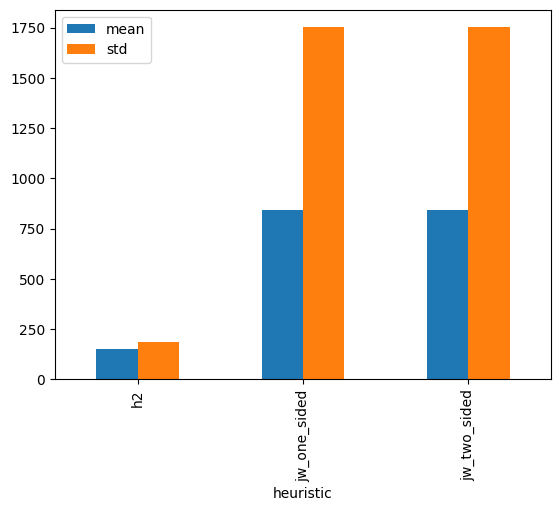

In [15]:
sudoku4x4_results.groupby(['heuristic'])['number_of_backtracks'].agg(['mean','std']).plot.bar()


<AxesSubplot: xlabel='heuristic'>

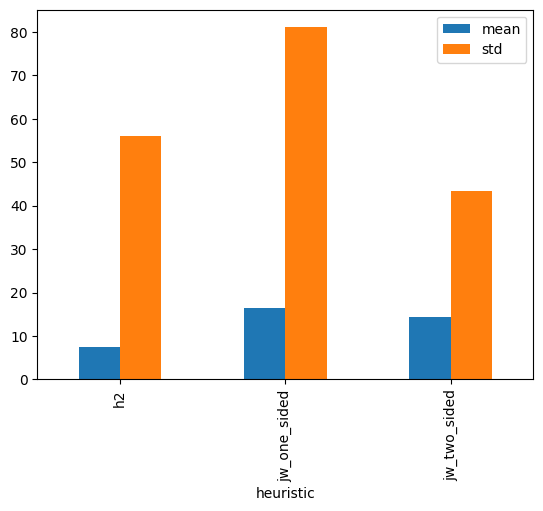

In [16]:
sudoku4x4_results.groupby(['heuristic'])['time_lapsed'].agg(['mean','std']).plot.bar()


[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

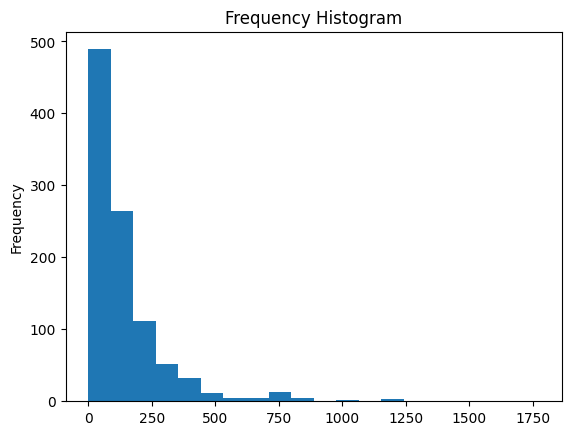

In [18]:
# Plot Histogram on x
plt.hist(result_df_h2['number_of_backtracks'], bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

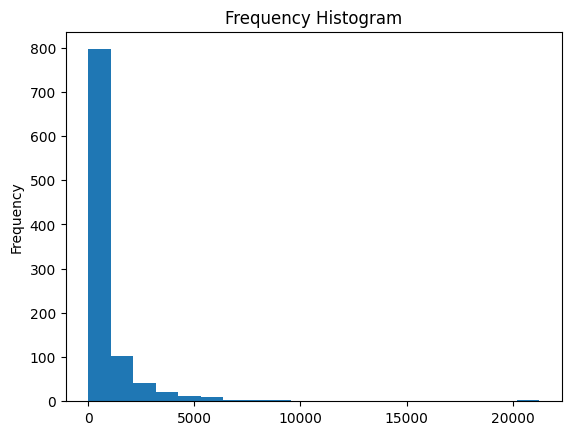

In [19]:
plt.hist(result_df_h3_two_sided['number_of_backtracks'], bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

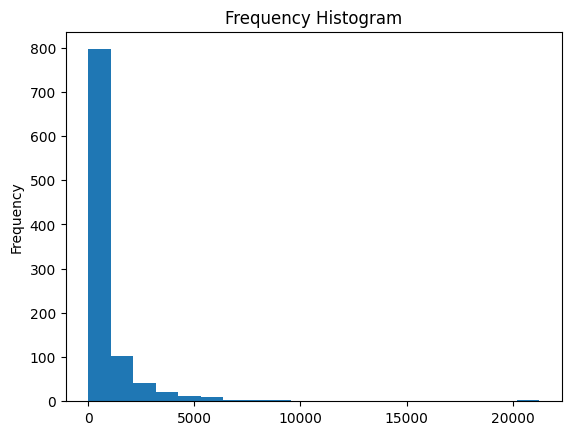

In [20]:
plt.hist(result_df_h3_one_sided['number_of_backtracks'], bins=20)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')